![](https://straightpathsql.com/wp-content/uploads/2016/09/straight-path-solutions-logo-header.png)

# Workshop: PowerShell Automation for the DBA

#### _A Straight Path Consulting Course from David Seis_

![](https://raw.githubusercontent.com/microsoft/sqlworkshops/master/graphics/textbubble.png)

## Course Notebook: Module 1 - Basic PowerShell Concepts

Welcome to this workshop on _PowerShell Automation for the DBA_. In this Notebook, you'll apply the concepts you learned in this Module.

This Notebook contains recipes for the basic building blocks that we will be using in the later automations.

## 1.1 PowerShell Concept: Commands

PowerShell commands and functions serve a similar purpose as stored procedures and functions in SQL Server. They allow you to execute specific tasks, encapsulating complex sequences of operations into callable units. This modular approach enhances efficiency and simplifies the optimization and manageability of tasks related to database administration. These commands follow a verb-noun structure.

In [3]:
<# Basic Commands #>

#get the current location of the powershell cli
get-location

#get the current date and time
Get-date

# get the region information of the computer
get-culture


Path              
----              
C:\Users\DavidSeis

DisplayHint : DateTime
Date        : 10/19/2024 12:00:00 AM
Day         : 19
DayOfWeek   : Saturday
DayOfYear   : 293
Hour        : 1
Kind        : Local
Millisecond : 98
Minute      : 1
Month       : 10
Second      : 4
Ticks       : 638648964640983831
TimeOfDay   : 01:01:04.0983831
Year        : 2024
DateTime    : Saturday, October 19, 2024 1:01:04 AM


Parent                         : en
LCID                           : 1033
KeyboardLayoutId               : 1033
Name                           : en-US
IetfLanguageTag                : en-US
DisplayName                    : English (United States)
NativeName                     : English (United States)
EnglishName                    : English (United States)
TwoLetterISOLanguageName       : en
ThreeLetterISOLanguageName     : eng
ThreeLetterWindowsLanguageName : ENU
CompareInfo                    : CompareInfo - en-US
TextInfo                       : TextInfo - en-US
IsNeutralC

## 1.2 PowerShell Concepts: Arguments

In both PowerShell and T-SQL, the concepts of arguments and parameters are integral to the execution of commands or functions. In PowerShell, arguments are specific values that are passed into parameters of cmdlets, functions, or scripts. Similarly, in T-SQL, parameters are used to pass values into stored procedures and functions. This mechanism allows for the dynamic execution of commands or queries.

In [4]:
<# Arguments for powershell commands are similar to parameters in T-SQL stored procedures #>
Get-ComputerInfo -Property "CsName","OsName","OsLastBootUpTime", "CsDomainRole"



CsName       OsName                        OsLastBootUpTime                CsDomainRole
------       ------                        ----------------                ------------
SEIS-WORK-VM Microsoft Windows 11 Business 10/18/2024 11:13:53 PM StandaloneWorkstation




## 1.3 PowerShell Concepts: Variables

PowerShell variables are storage entities that hold values, objects, or data. They are denoted by a dollar sign followed by the variable name, such as `$variable`. Variables in PowerShell can store a wide range of data types, from simple strings and integers to complex data structures and objects. They are dynamically typed, unlike T-SQL's declarative method, meaning the data type is determined by the value it holds and can change over time. This flexibility makes variables a powerful tool in PowerShell scripting.

In [5]:
<# Brief Demonstration of Variables #>

$characterName = "Frodo Baggins"
$characterJob = "Ring-bearer"
$Role = "Hobbit of the Shire"

# Use variables in a string
$message = "Greetings, I am $characterName, a $characterJob and I am a $Role on a quest to destroy the One Ring."

# Output the message
Write-Output $message

Greetings, I am Frodo Baggins, a Ring-bearer and I am a Hobbit of the Shire on a quest to destroy the One Ring.


## 1.4 PowerShell Concepts: Piping

In PowerShell scripting, piping is a powerful feature that allows the output of one command to be passed as input to another. This enables the chaining of commands in a way that each command performs its operation and passes its result onto the next, facilitating complex data manipulation and processing in a streamlined manner.

In [6]:
# Get a list of actors
$Actors = "Viggo Mortensen", "Elijah Wood", "Ian McKellen", "Orlando Bloom", "Sean Bean", "Liv Tyler"

# Use piping to filter and manipulate data
$Actors | Where-Object { $_ -match 'Mortensen' } | ForEach-Object { "$_ is the true king" }

Viggo Mortensen is the true king


## 1.5 PowerShell Concepts: Modules

PowerShell modules are packages of PowerShell functions, cmdlets, and other resources that can be used to automate tasks and extend the functionality of PowerShell. In the context of SQL Server, community-built libraries like Ola Hallengren’s Maintenance Solution and Brent Ozar’s First Responder Kit serve a similar purpose. These libraries provide a collection of scripts and tools designed to automate common maintenance tasks, improve performance, and assist in troubleshooting SQL Server issues. DBAtools is a community-driven, open-source PowerShell module for managing SQL Server. <span style="color: var(--vscode-foreground);">DBAtools supports a wide range of features and editions in SQL Server, making tasks such as backup/restore, monitoring, and administration more straightforward. It’s a testament to the power of community collaboration and the principle of code reuse, making complex tasks more manageable and efficient for DBAs. It’s an invaluable tool for any DBA as you will see shortly.</span>


-[dbatools](https://www.dbatools.io)

In [2]:
<# Code to install Dbatools #>

Install-Module Dbatools

Install-Module : Administrator rights are required to install modules in 'C:\Program Files\WindowsPowerShell\Modules'. 
Log on to the computer with an account that has Administrator rights, and then try again, or install 
'C:\Users\DavidSeis\Documents\WindowsPowerShell\Modules' by adding "-Scope CurrentUser" to your command. You can also 
try running the Windows PowerShell session with elevated rights (Run as Administrator).
At line:3 char:1
+ Install-Module Dbatools
+ ~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidArgument: (:) [Install-Module], ArgumentException
    + FullyQualifiedErrorId : InstallModuleNeedsCurrentUserScopeParameterForNonAdminUser,Install-Module
 


Some powershell commands must be run in an administrator PowerShell window. installing modules is one of those tasks, and my <span style="color: var(--vscode-foreground);">go-to is the integrated scripting environment or Powershell ISE. before installing&nbsp;</span> <span style="color: var(--vscode-foreground);">you will get a request to install NuGet, which you can read about here:&nbsp;</span> [https://www.nuget.org/](https:\www.nuget.org\)<span style="color: var(--vscode-foreground);">. It is a package provier used by the powershell community.</span>

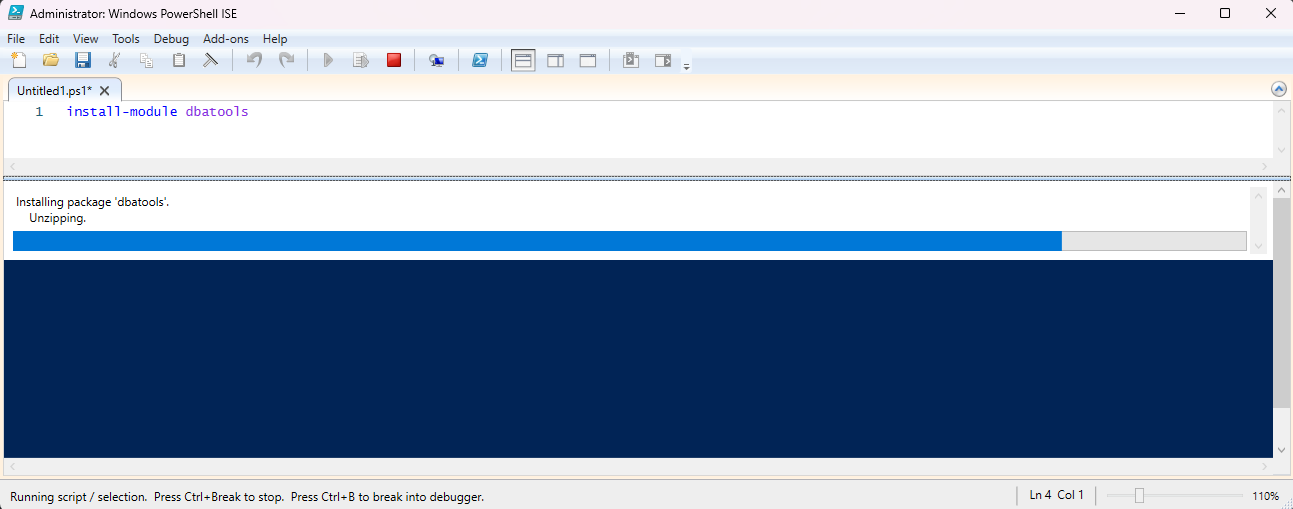

In [7]:
<# Get currently installed Powershell modules #>

Get-InstalledModule



Version    Name                                Repository           Description                                        
-------    ----                                ----------           -----------                                        
2.1.14     dbatools                            PSGallery            The community module that enables SQL Server Pro...


2024.4.12  dbatools.library                    PSGallery            The library that powers dbatools, the community ...
0.4.1      PSSendGrid                          PSGallery            Wrapper around the SendGrid API                    
22.3.0     SqlServer                           PSGallery            This module allows SQL Server developers, admini...


